In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
batting_df = pd.read_csv('/content/PSL_Batting_Dataset.csv')

In [ ]:
batting_df.head()

,Unnamed: 0,Team,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,0,Islamabad United,Abrar Ahmed,2023-2023,3,2,-,-,-,0.0,0.00,-,-,2
1,1,Islamabad United,Agha Salman,2024-2024,12,12,2,310,64*,31.0,140.27,-,2,-
2,2,Islamabad United,Ahmed Safi Abdullah,2020-2020,3,2,2,9,8*,0.0,69.23,-,-,-
3,3,Islamabad United,Akif Javed,2020-2021,11,3,3,-,0*,0.0,0.00,-,-,-
4,4,Islamabad United,Ali Khan,2021-2021,3,-,-,-,-,0.0,0.00,-,-,-


In [ ]:
batting_df.shape

(581, 14)

In [ ]:
batting_df = batting_df.drop('Unnamed: 0', axis=1)

In [ ]:
batting_df.head()

,Team,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,Islamabad United,Abrar Ahmed,2023-2023,3,2,-,-,-,0.0,0.00,-,-,2
1,Islamabad United,Agha Salman,2024-2024,12,12,2,310,64*,31.0,140.27,-,2,-
2,Islamabad United,Ahmed Safi Abdullah,2020-2020,3,2,2,9,8*,0.0,69.23,-,-,-
3,Islamabad United,Akif Javed,2020-2021,11,3,3,-,0*,0.0,0.00,-,-,-
4,Islamabad United,Ali Khan,2021-2021,3,-,-,-,-,0.0,0.00,-,-,-


In [ ]:
batting_df['Team'].unique()

array(['Islamabad United', 'Karachi Kings', 'Lahore Qalandars',
       'Multan Sultans', 'Peshawar Zalmi', 'Quetta Gladiators'],
      dtype=object)

In [ ]:
def rename_teams(team):
  if team == 'Karachi Kings':
    return 'KK'
  elif team == 'Lahore Qalandars':
    return 'LQ'
  elif team == 'Peshawar Zalmi':
    return 'PS'
  elif team == 'Islamabad United':
    return 'IU'
  elif team == 'Quetta Gladiators':
    return 'QG'
  elif team == 'Multan Sultans':
    return 'MS'

In [ ]:
batting_df['Team'] = batting_df['Team'].apply(rename_teams)

In [ ]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    581 non-null    object 
 1   Player  581 non-null    object 
 2   Span    581 non-null    object 
 3   Mat     581 non-null    int64  
 4   Inns    581 non-null    object 
 5   NO      581 non-null    object 
 6   Runs    581 non-null    object 
 7   HS      581 non-null    object 
 8   Ave     581 non-null    float64
 9   SR      581 non-null    float64
 10  100     581 non-null    object 
 11  50      581 non-null    object 
 12  0       581 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 59.1+ KB


In [ ]:
cols = ['Inns', 'NO', 'Runs' , 'HS' , '100' , '50', '0']
batting_df[cols] = batting_df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    581 non-null    object 
 1   Player  581 non-null    object 
 2   Span    581 non-null    object 
 3   Mat     581 non-null    int64  
 4   Inns    534 non-null    float64
 5   NO      352 non-null    float64
 6   Runs    492 non-null    float64
 7   HS      302 non-null    float64
 8   Ave     581 non-null    float64
 9   SR      581 non-null    float64
 10  100     16 non-null     float64
 11  50      157 non-null    float64
 12  0       237 non-null    float64
dtypes: float64(9), int64(1), object(3)
memory usage: 59.1+ KB


Who are the top 5 players with the highest batting averages across all teams?

In [ ]:
min_innings = 20

top_players = batting_df[batting_df['Inns'] >= min_innings].groupby(['Player', 'Team'])['Ave'].mean().reset_index()
top_players = top_players.loc[top_players.groupby('Player')['Ave'].idxmax()]
top_players = top_players.sort_values(by=['Ave'], ascending=False).head(5)

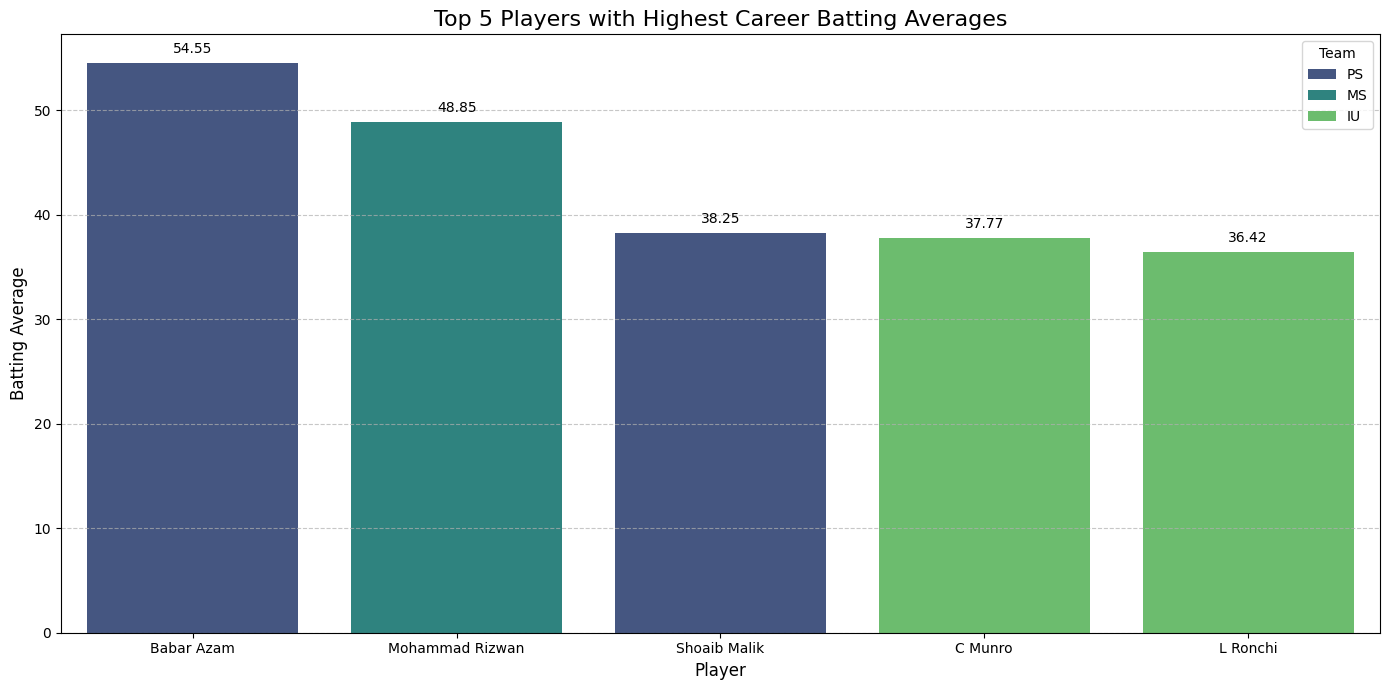

In [ ]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Player', y='Ave', hue='Team', data=top_players, dodge=False, palette="viridis")

plt.title('Top 5 Players with Highest Career Batting Averages', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Batting Average', fontsize=12)
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.legend(title='Team')
plt.show()

Which player has the highest strike rate in the dataset?

In [ ]:
min_innings = 10

highest_strikers = batting_df[batting_df['Inns'] >= min_innings] \
    .groupby(['Team', 'Player'])['SR'].max() \
    .sort_values(ascending=False)[0:5]

print(highest_strikers)

Team  Player        
MS    Iftikhar Ahmed    193.28
      TH David          185.58
PS    KA Pollard        173.17
MS    Usman Khan        172.54
PS    Mohammad Haris    171.35
Name: SR, dtype: float64


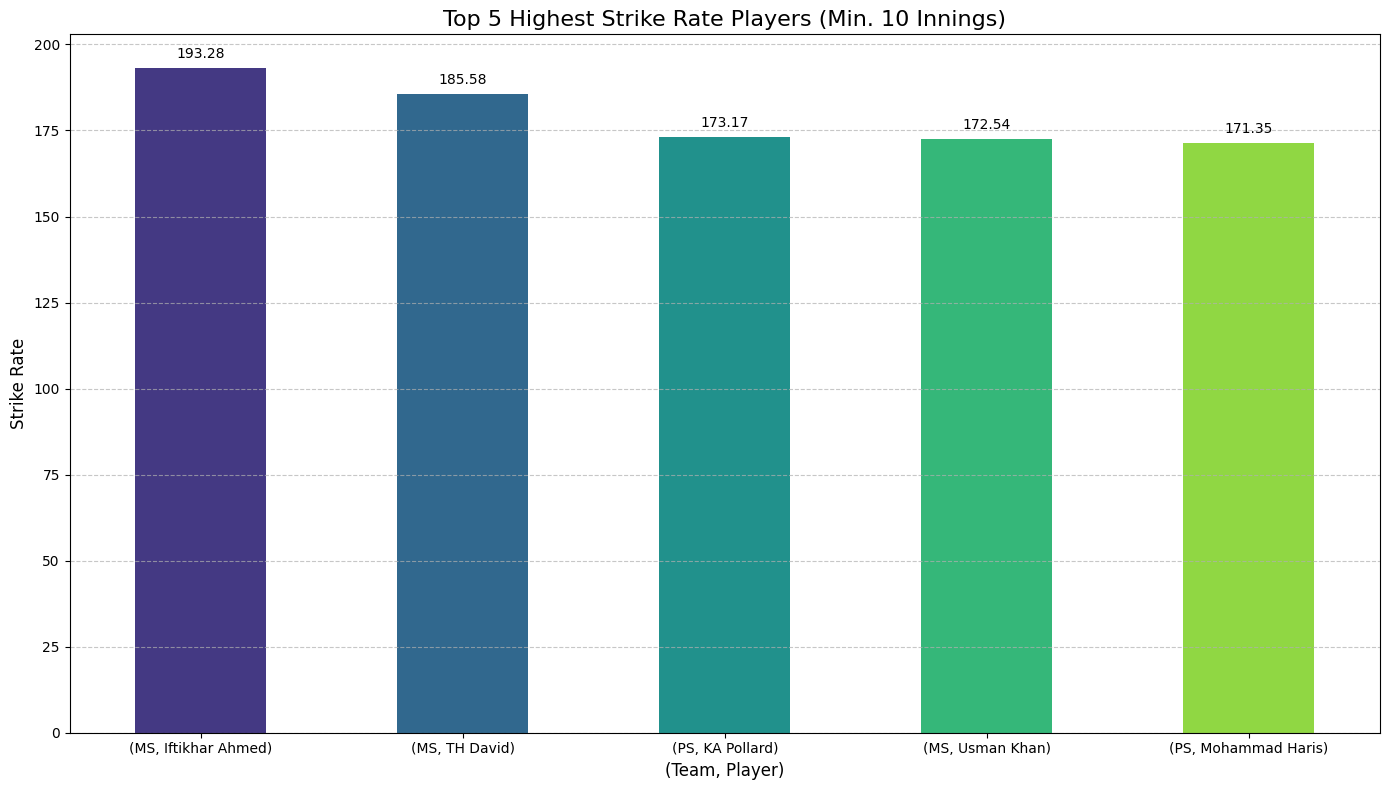

In [ ]:

plt.figure(figsize=(14, 8))
ax = highest_strikers.plot(kind='bar', color=sns.color_palette("viridis", len(top_players)))


plt.title("Top 5 Highest Strike Rate Players (Min. 10 Innings)", fontsize=16)
plt.xlabel("(Team, Player)", fontsize=12)
plt.ylabel("Strike Rate", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Which team has the highest average number of runs per player?

In [ ]:
highest_avg = batting_df.groupby('Team')['Runs'].mean().sort_values(ascending=False)[0:1]
team = highest_avg.index[0]
avg = highest_avg.values[0]
print(f"The team with the highest average number of runs per player is {team} with an average of {avg:.2f} runs per player.")

The team with the highest average number of runs per player is IU with an average of 199.96 runs per player.


Which team has the most players scoring centuries 100s?

In [ ]:
century_df = batting_df[batting_df['100'] > 0]

top_team = century_df.groupby('Team')['100'].count().sort_values(ascending=False)[0:1]

team_name = top_team.index[0]

top_team_players = century_df[century_df['Team'] == team_name]['Player'].unique()

print(f"The team with the most centuries is: {team_name} with {len(top_team_players)} centuries")
print(f"Players who scored centuries for {team_name}: {', '.join(top_team_players)}")

The team with the most centuries is: LQ with 4 centuries
Players who scored centuries for LQ: HC Brook, Fakhar Zaman, CA Lynn, HE van der Dussen


Which player has the most not-outs (NO) and how does it correlate with their batting average?

In [ ]:
batting_df.groupby('Player')['NO'].sum().sort_values(ascending=False)[0:5]

,NO
Player,
Imad Wasim,26.0
Wahab Riaz,21.0
Sarfaraz Ahmed,21.0
Khushdil Shah,20.0
Faheem Ashraf,20.0


In [ ]:
most_not_outs = batting_df.groupby('Player')['NO'].sum().sort_values(ascending=False).head(1)
player_name = most_not_outs.index[0]
not_outs_count = most_not_outs.values[0]

player_avg = batting_df[batting_df['Player'] == player_name]['Ave'].mean()

print(f"{player_name} has the most not-outs with {not_outs_count}. His batting average is {player_avg:.2f}")

Imad Wasim has the most not-outs with 26.0. His batting average is 24.07


In [ ]:
batting_df[batting_df['Player'] == "Mohammad Rizwan"]

,Team,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
139,KK,Mohammad Rizwan,2018-2020,19,12.0,4.0,167.0,34.0,20.87,106.36,NaN,NaN,NaN
250,LQ,Mohammad Rizwan,2016-2017,16,12.0,3.0,233.0,NaN,25.88,123.93,NaN,1.0,1.0
335,MS,Mohammad Rizwan,2021-2024,48,48.0,7.0,2003.0,NaN,48.85,130.06,1.0,19.0,4.0


Are players with higher innings (Inns) more consistent performers compared to others?

In [ ]:
batting_df.head(1)

,Team,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,IU,Abrar Ahmed,2023-2023,3,2.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2.0


In [ ]:
most_innigs_played =  batting_df.groupby('Player')['Inns'].sum().sort_values(ascending=False)[0:5]

In [ ]:
top_runs_players = batting_df.groupby('Player')['Runs'].sum().sort_values(ascending=False)[0:5]

In [ ]:
top_innings_players = list(most_innigs_played.index)
top_runs_players = list(batting_df.groupby('Player')['Runs'].sum().sort_values(ascending=False)[0:5].index)
common_players = list(set(top_innings_players) & set(top_runs_players))
print("Players in both top 5 lists:", common_players)

Players in both top 5 lists: ['Fakhar Zaman', 'Shoaib Malik', 'RR Rossouw', 'Babar Azam']


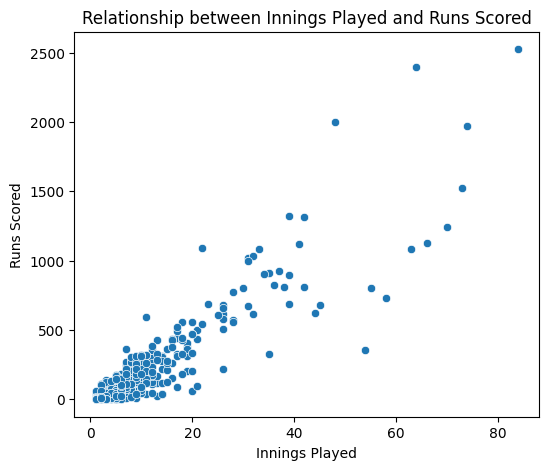

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Inns', y='Runs', data=batting_df)
plt.title('Relationship between Innings Played and Runs Scored')
plt.xlabel('Innings Played')
plt.ylabel('Runs Scored')
plt.show()

In [ ]:
correlation = batting_df['Inns'].corr(batting_df['Runs'])
print("Correlation between Innings and Runs:", correlation)

Correlation between Innings and Runs: 0.9071819766585105


What is the highest individual score (HS) in the dataset, and which player and team does it belong to?

In [ ]:
highest_score = batting_df.groupby(['Player','Team'])['HS'].max().sort_values(ascending=False).head(1)
player_name = highest_score.index[0][0]
team_name = highest_score.index[0][1]
score_value = highest_score.values[0]

print(f"The highest individual score is {score_value} by {player_name} playing for {team_name}.")

The highest individual score is 121.0 by RR Rossouw playing for MS.


Who scored the most ducks (0s), and does it indicate an underperforming player or someone taking risks?

In [ ]:
batting_df.head(1)

,Team,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,IU,Abrar Ahmed,2023-2023,3,2.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2.0


In [ ]:
most_ducks = batting_df.groupby('Player')['0'].sum().sort_values(ascending=False).head(1)
player_name = most_ducks.index[0]
duck_count = most_ducks.values[0]

print(f"{player_name} has the most ducks with {duck_count}.")

Imad Wasim has the most ducks with 12.0.


In [ ]:
player_avg = batting_df[batting_df['Player'] == player_name]['Ave'].mean()
print(f"His batting average is {player_avg:.2f}.")

His batting average is 24.07.


In [ ]:
player_sr = batting_df[batting_df['Player'] == player_name]['SR'].mean()
print(f"His strike rate is {player_sr:.2f}.")

His strike rate is 134.71.


In [ ]:
print("""
Imad Wasim's high strike rate and decent batting average despite having the most ducks suggest \nthat he is a player who takes calculated risks.\n
""")


Imad Wasim's high strike rate and decent batting average despite having the most ducks suggest 
that he is a player who takes calculated risks.




How do players with centuries (100s) distribute their runs compared to those who primarily score half-centuries (50s)?

How do players with centuries (100s) distribute their runs compared to those who primarily score half-centuries (50s)

In [ ]:
century_players = batting_df[batting_df['100'] >= 1]

fifty_players = batting_df[(batting_df['50'] > batting_df['100']) & (batting_df['50'] > 0)]

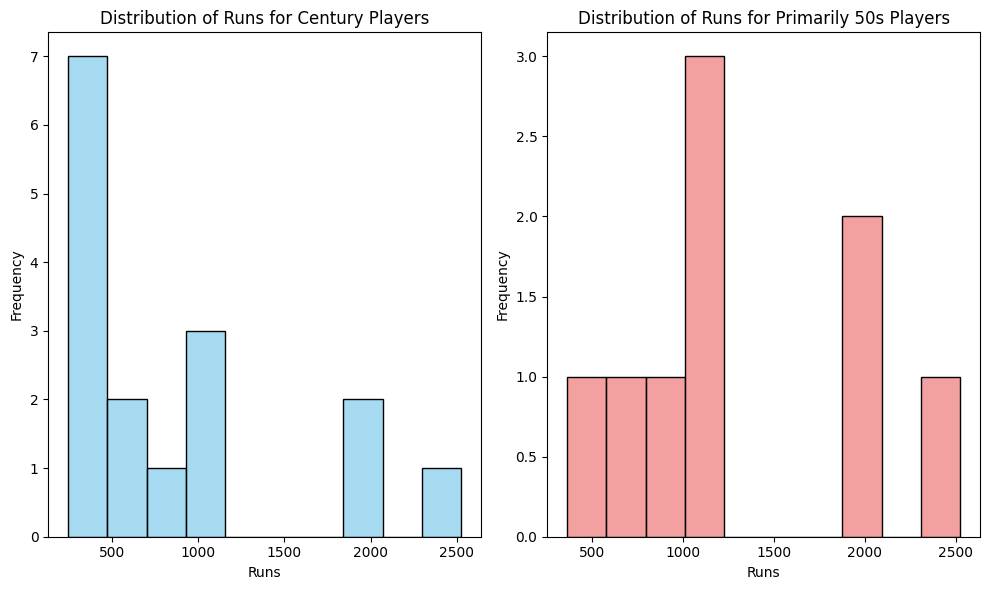

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(century_players['Runs'], bins=10, color='skyblue')
plt.title('Distribution of Runs for Century Players')
plt.xlabel('Runs')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(fifty_players['Runs'], bins=10, color='lightcoral')
plt.title('Distribution of Runs for Primarily 50s Players')
plt.xlabel('Runs')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Runs Distribution')
plt.show()

### Conclusion

Century players have a higher potential for scoring large numbers of runs, but they may also be less consistent. Primarily 50s players tend to be more consistent but with a lower ceiling for their run totals.

Which player has the best runs-per-match ratio?

In [ ]:
batting_df.head(1)

,Team,Player,Span,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,IU,Abrar Ahmed,2023-2023,3,2.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2.0


In [ ]:
player_summary = batting_df.groupby('Player').agg({
    'Mat': 'sum',
    'Inns': 'sum',
    'Runs': 'sum',
    'NO': 'sum',
    'HS': 'max',
    'Ave': 'mean',
    'SR': 'mean',
    '100': 'sum',
    '50': 'sum',
    '0': 'sum'
}).reset_index()

In [ ]:
player_summary['Runs_per_Match'] = player_summary['Runs'] / player_summary['Inns']

In [ ]:
top_players_rpm = player_summary[player_summary['Mat']>20].groupby(['Player','Runs','Mat'])['Runs_per_Match'].mean().sort_values(ascending=False)[0:5]

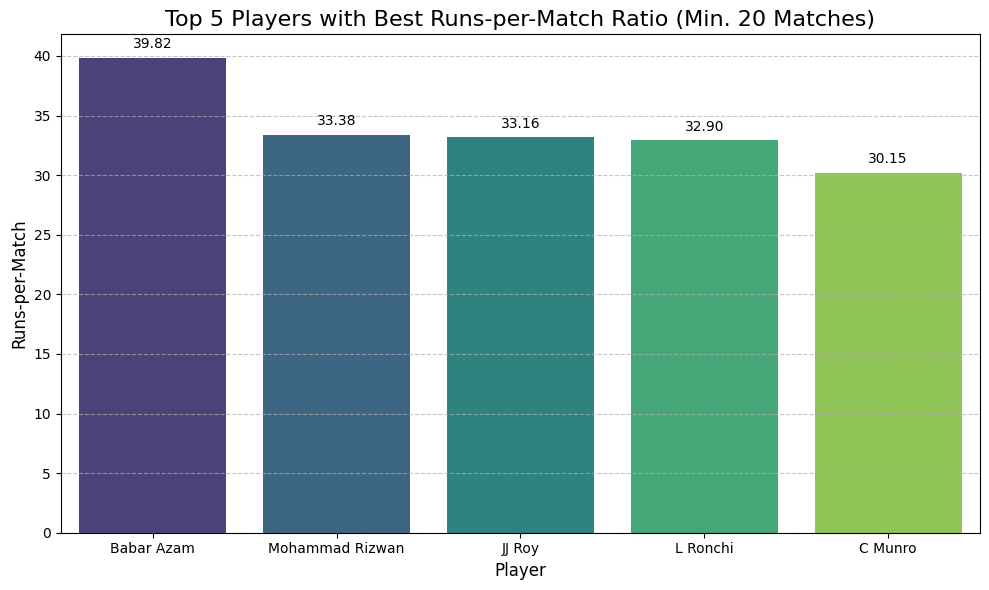

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_players_rpm.index.get_level_values('Player'), y=top_players_rpm.values, palette="viridis")

plt.title('Top 5 Players with Best Runs-per-Match Ratio (Min. 20 Matches)', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Runs-per-Match', fontsize=12)
plt.xticks(rotation='horizontal', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Are high scorers also the most efficient in terms of strike rate?

In [ ]:
top_run_scorers = batting_df.groupby('Player')['Runs'].sum().sort_values(ascending=False)[0:5]
player_names = top_run_scorers.index[0:]
runs = top_run_scorers.values[0:]
top_run_scorers

,Runs
Player,
Babar Azam,3504.0
Fakhar Zaman,2525.0
Mohammad Rizwan,2403.0
Shoaib Malik,2336.0
RR Rossouw,2015.0


In [ ]:
top_scorer_strike_rates = batting_df[batting_df['Player'].isin(player_names)].groupby('Player')['SR'].mean()

print(top_scorer_strike_rates)

Player
Babar Azam         107.863333
Fakhar Zaman       140.270000
Mohammad Rizwan    120.116667
RR Rossouw         143.155000
Shoaib Malik       126.653333
Name: SR, dtype: float64


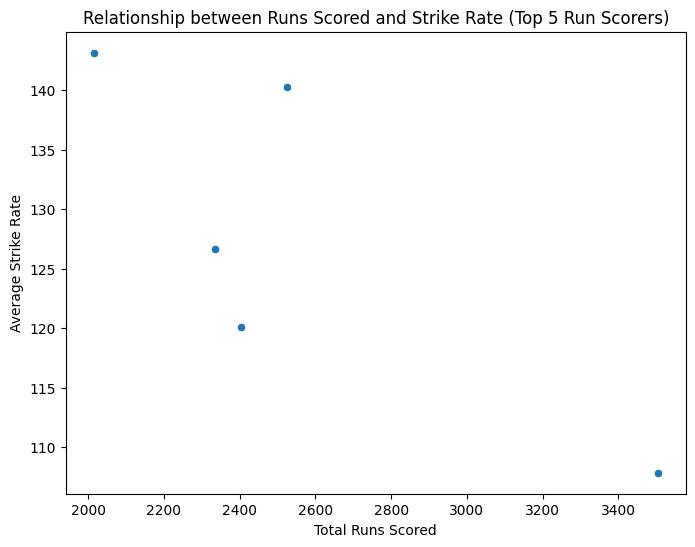

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=top_run_scorers, y=top_scorer_strike_rates)
plt.title('Relationship between Runs Scored and Strike Rate (Top 5 Run Scorers)')
plt.xlabel('Total Runs Scored')
plt.ylabel('Average Strike Rate')
plt.show()

In [ ]:
correlation = top_run_scorers.corr(top_scorer_strike_rates)
print(f"Correlation between Runs Scored and Strike Rate: {correlation}")

Correlation between Runs Scored and Strike Rate: -0.798713834437485


## Conclusion
This suggests that, among the top 5 run scorers, those who have scored more runs tend to have a lower strike rate. In other words, the players who have accumulated the most runs might not be the fastest scorers in terms of runs per ball faced.

In [ ]:
batting_df['Runs']